# Análise Exploratória + Limpeza + Seleção + Transformação)

---

Alunos:

- Caio Cardoso
- Adson Leal
- Diego Marzarotto

---

## Objetivo

---

- desenvolver um modelo de classificação capaz de inferir o desfecho do caso, a partir de outros atributos do conjunto de dados
- proposta inicial era um modelo para inferir o tratamento indicado para cada caso
- as classes seriam geradas com base em combinações dos tratamentos aplicados para cada caso
- explosão combinatória de classes inviabilizou a abordagem
- decidiu-se por usar o desfecho do caso como rótulo

## Motivação

---

- o modelo pode ser utilizado para realizar uma pré-triagem dos casos
- o desfecho provável de um caso poderia ser útil para priorizar o atendimento de novos casos
- maneira exata de como utilizar estas classficações é dependente de um melhor conhecimento do domínio
- por exemplo: como priorizar um caso que o desfecho provável seja óbito?

## Análise exploratória

---

In [1]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

%matplotlib inline

In [2]:
df01 = pd.read_csv('./01_caso_intoxicacao', sep='|', index_col='identificador_caso')
df04 = pd.read_csv('./04_paciente', sep='|', index_col='identificador_caso')
df05 = pd.read_csv('./05_exposicao', sep='|', index_col='identificador_caso')
df06 = pd.read_csv('./06_agente_intoxicante', sep='|', index_col='identificador_caso')
df07 = pd.read_csv('./07_manifestacao', sep='|', index_col='identificador_caso')
df12 = pd.read_csv('./12_encerramento', sep='|', index_col='identificador_caso')

In [3]:
def describe_and_plot(col, kind='bar', relative=False):
    count = col.value_counts()
    if relative:
        count = count / float(col.shape[0])
    print count
    count.sort_values(ascending=(kind == 'barh')).plot(kind=kind, color='b', alpha=0.5)
    plt.show()

In [4]:
def one_hot(col, prefix):
    col_one_hot = pd.get_dummies(col, prefix=prefix)
    return col_one_hot.groupby(col_one_hot.index).max()

---

### tabela 01_caso_intoxicacao

In [5]:
df01.index.size # nr. de registros

46083

---

- atributo **classificacao_gravidade**

Leve        37837
Moderada     2913
Grave        1575
Name: classificacao_gravidade, dtype: int64


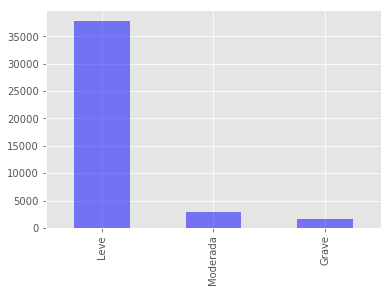

In [6]:
describe_and_plot(df01.classificacao_gravidade)

Decidiu-se por transformar o atributo categórico em 3 atributos binários distintos, um para cada valor possível

---

- atributo **manifestacao_clinica**

Sim         35414
Não          7237
Ignorada       28
Name: manifestacao_clinica, dtype: int64


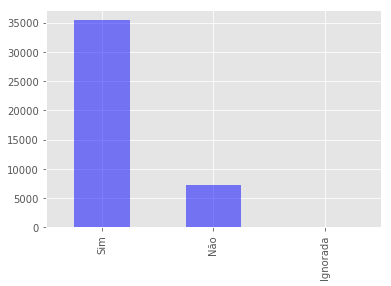

In [7]:
describe_and_plot(df01.manifestacao_clinica)

Decidiu-se por transformar o atributo categórico em 3 atributos binários distintos, um para cada valor possível

---

### tabela 04_paciente

In [8]:
df04.index.size # nr. de registros

42575

O fato de existirem menos registros nesta tabela nos leva a decidir por utlizar somente casos que possuam registros correspondentes nesta tabela

---

- atributo **especificacao_idade**

Anos                            41204
Meses                             813
Ignorado Adulto (> 15 anos)       312
Ignorado                          113
Dias                               46
Ignorado Criança (< 14 anos)       18
Name: especificacao_idade, dtype: int64


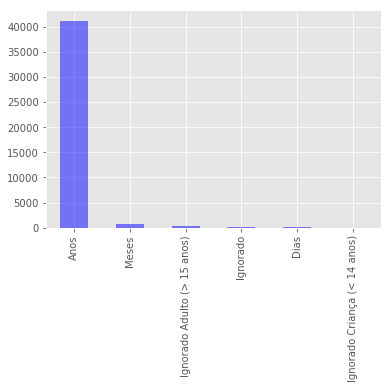

In [9]:
describe_and_plot(df04.especificacao_idade)

---

- atributo **idade**

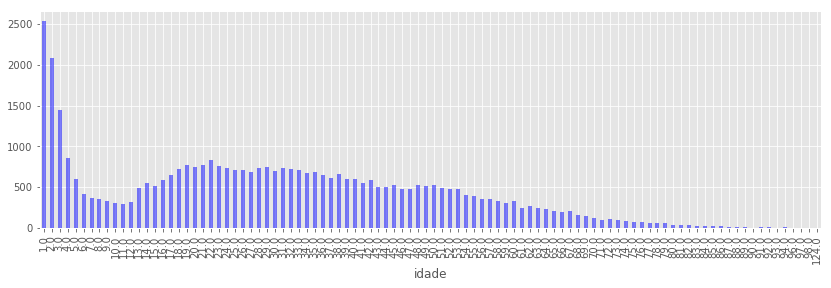

In [36]:
countby_idade = df04[df04.especificacao_idade == 'Anos'].groupby('idade').idade.count()
countby_idade.plot(kind='bar', color='b', alpha=0.5, figsize=(14,4))
    
plt.show()

As informações sobre as idades dos pacientes nos leva a criar diferentes categorias de idade, com um atributo binário para cada uma destas categorias: 

- bebê (até 2 anos)
- criança (2 até 10 anos)
- pré-adolescente (10 até 13 anos)
- adolescente (13 até 16 anos)
- jovem (18 até 30 anos)
- adulto (30 até 60 anos)
- idoso (acima de 60 anos)

---

- atributo **periodo_gestacao**

Não se aplica             27308
Não                        9485
Ignorado                   4873
Segundo trimestre           135
Primeiro trimestre          119
Terceiro trimestre          104
Trimestre desconhecido       34
Name: periodo_gestacao, dtype: int64


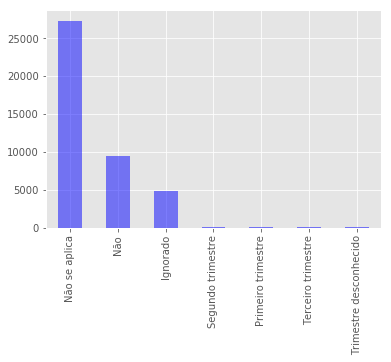

In [11]:
describe_and_plot( df04.periodo_gestacao)

As informações sobre gestação nos levam a decidir por criar um atributo binário indicando se é gestante ou não.

---

- atributo **peso**

In [12]:
print df04.peso.sort_values(ascending=False)[:10] # top-10

identificador_caso
171850    500.0
131590    500.0
275492    200.0
74661     200.0
32900     162.0
117345    150.0
222842    150.0
140369    149.0
305287    147.0
280473    143.0
Name: peso, dtype: float64


Os dados indicam a presença de outliers, or isso decidiu-se por ignorar os registros com peso muito acima da média.

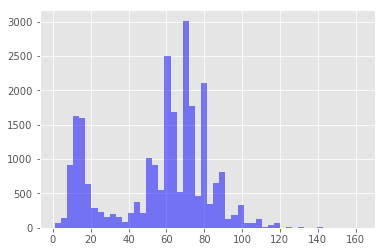

In [37]:
df04[df04.peso<200].peso.hist(bins=50, color='b', alpha=0.5)

Os dados indicam que a informação de peso pode não ser muito confiável, pois existem muito valores "redondos" (10, 60, 65, 70, etc.), o que nos leva a discretizar este atributo, ao invés de normalizar e utilizar o valor numérico. Decidiu-se por criar um atributo binário para cada categoria:

- até 5 kg
- 5 até 15 kg
- 15 até 25 kg
- 25 até 35 kg
- 35 até 45 kg
- 45 até 60 kg
- 55 até 70 kg
- 65 até 80 kg
- 75 até 90 kg
- 85 até 95 kg
- acima de 95kg

---

- atributo **sexo**

Feminino     21777
Masculino    20651
Ignorado        81
Name: sexo, dtype: int64


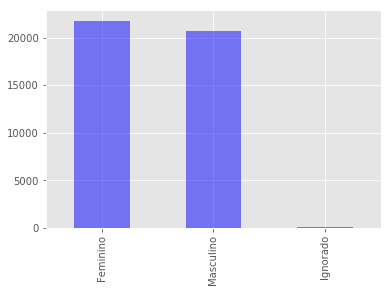

In [14]:
describe_and_plot(df04.sexo)

Decidiu-se por transformar o atributo categórico em 3 atributos binários distintos, um para cada valor possível

---

### tabela 05_exposicao

O um mesmo paciente pode ter sido atendido após exposto a mais de um tipo de agente intoxicante, então pode haver mais de um registro por paciente na tabela. 

---

- atributo **intensidade_exposicao**

Aguda - Única          40592
Aguda sobre Crônica     1238
Aguda - Repetida        1145
Ignorado                1143
Crônica                  351
Name: intensidade_exposicao, dtype: int64


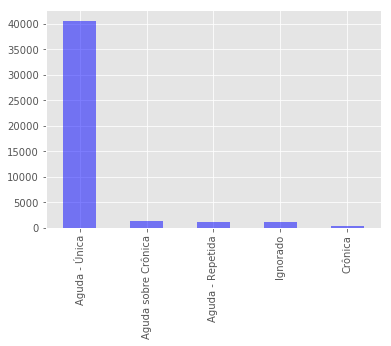

In [15]:
describe_and_plot(df05.intensidade_exposicao)

---

- atributo **via_exposicao**

Oral                        19087
Mordida/Picada/Contato      17204
Cutânea                      2451
Respiratória/Inalatória      2239
Ignorada                     1707
Ocular                        630
Não se aplica                 587
Nasal                         365
Parenteral Intravenosa        116
Outra                         111
Parenteral Intramuscular       71
Parenteral Subcutânea          37
Parenteral Intradérmica        14
Sublingual                      3
Otológica                       2
Vaginal                         2
Retal                           1
Transplacentária                1
Name: via_exposicao, dtype: int64


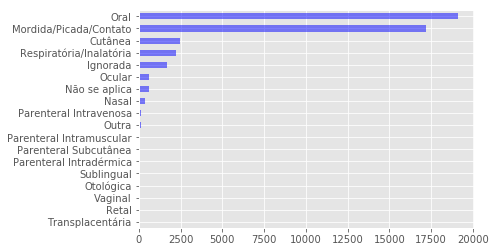

In [16]:
describe_and_plot(df05.via_exposicao, kind='barh')

---

- atributo **circunstancia_exposicao**

Acidental                                                       24497
Tentativa de Suicídio                                            9754
Ocupacional                                                      3848
Ignorada                                                         2347
Abuso                                                            1314
Outra                                                             757
Erro de Medicação - Dose                                          364
Uso Terapêutico                                                   324
Automedicação - Iniciativa do próprio paciente e/ou cuidador      317
Erro de Medicação - Troca de Embalagens                           224
Reação Adversa: Medicamento                                       199
Uso Indevido                                                      173
Ingestão Alimentar                                                 77
Erro de Medicação - Troca de Nomes                                 74
Erro de Medicação - 

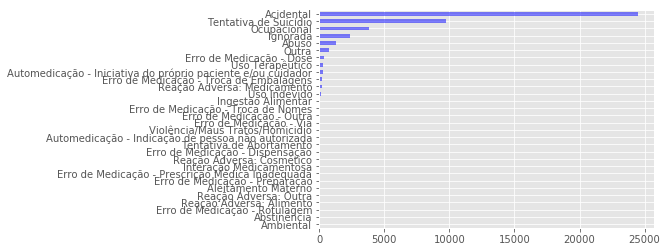

In [17]:
describe_and_plot(df05.circunstancia_exposicao, kind='barh')

Quanto aos atributos circunstancia_exposicao, via_exposicao e intensidade_exposicao, decidiu-se por criar um atributo binário para cada valor possível de cada um destes três atributos. Esta abordagem nos facilita ao lidar com casos com mais de um registro de exposicao.  

Optou-se por não se utilizar os atributos tempo_decorrido e especificacao_tempo_decorrido, por serem específicos de uma exposição individual, e encontrou-se dificuldade de representar esta informação na forma de um único registro no novo conjunto de dados a ser criado.

---

### tabela 06_agente_intoxicante

---

- atributo **grupo_agente**

MEDICAMENTOS                                     21806
ANIMAIS PEÇONHENTOS/VENENOSOS                    13563
OUTROS                                            8265
AGROTÓXICOS                                       2757
PRODUTOS QUÍMICOS RESIDENCIAIS OU INDUSTRIAIS     2360
DROGAS DE ABUSO                                   2165
PRODUTOS DOMISSANITÁRIOS                          1965
ANIMAIS NÃO PEÇONHENTOS/NÃO VENENOSOS             1684
RATICIDAS                                          977
PLANTAS E FUNGOS                                   597
INSETICIDAS DE USO DOMÉSTICO                       509
PRODUTOS DE USO VETERINÁRIO                        490
COSMÉTICOS E HIGIENE PESSOAL                       384
ALIMENTOS                                           75
METAIS                                              50
Name: grupo_agente, dtype: int64


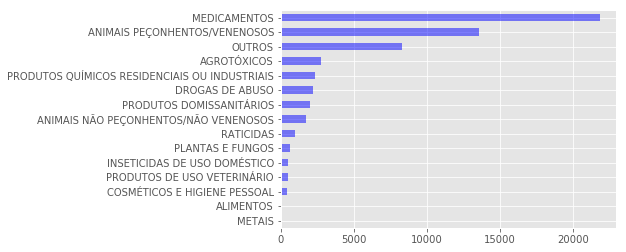

In [18]:
describe_and_plot(df06.grupo_agente, kind='barh')

In [19]:
df06.grupo_agente.value_counts().shape

(15,)

---

- atributo **classe_agente**

In [20]:
df06.classe_agente.value_counts().shape

(226,)

---

- atributo **subclasse_agente**

In [21]:
df06.subclasse_agente.value_counts().shape

(612,)

Decidiu-se por criar um atributo binário para cada categoria do atributo grupo_agente. Os atributos classe_agente e subclasse_agente não serão utilizados inicialmente por possuirem muitos valores, o que aumentará muito o número de atributos.

---

### tabela 07_manifestacao

---

- atributo **classificacao_manifestacao**

Dermatológicas                                      45296
Neuro/psíquica/muscular                             12617
Digestivas                                           9368
Cardiológicas                                        2722
Diagnósticos Anatômicos, Funcionais, Sindrômicos     1809
Oculares                                             1752
Respiratórias                                        1574
Outras                                                880
Gerais                                                739
Genitourinária                                        238
Otorrinolaringológicas                                 62
Name: classificacao_manifestacao, dtype: int64


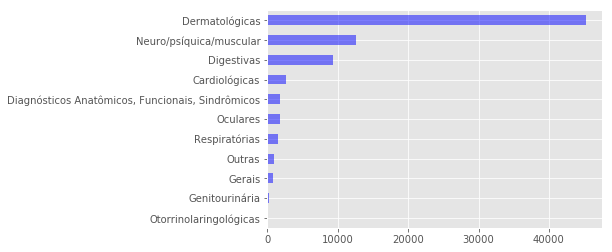

In [22]:
describe_and_plot(df07.classificacao_manifestacao, kind='barh')

---

- atributo **manifestacao_apresentada**

In [23]:
df07.manifestacao_apresentada.value_counts().shape

(208,)

In [24]:
df07.manifestacao_apresentada.value_counts().head(20)

Dor (Dermatológicas)              13396
Hiperemia                          7448
Edema                              7271
Sonolência                         4826
Eritema                            3230
Vômitos                            3147
Prurido                            2742
Náuseas                            2419
Parestesia (Dermatológica)         2019
Marca das presas/da picada         1938
Equimose                           1360
Cefaléia                           1256
Taquicardia                        1222
Bolhas                             1207
Agitação                           1197
Alteração Nível de Consciência     1173
Dor abdominal                       945
Calor local                         935
Tonturas / Vertigem                 889
Outras                              880
Name: manifestacao_apresentada, dtype: int64

Decidiu-se utilizar inicialmente os valores do atributo classificacao_manifestacao como novos atributos booleanos. O atributo manifestacao_apresentada não será incluído na primeira versão do conjunto de dados por também possuir muitos valores.

---

### tabela 12_encerramento

---

- atributo **desfecho**

Manifestações Clínicas Leves                            0.536333
Diagnóstico Diferencial (confirmada a não exposição)    0.151111
Sem Manifestações Clínicas (Assintomático)              0.129828
Manifestações Clínicas Moderadas                        0.041427
Exposição não tóxica, sem acompanhamento                0.029045
Manifestações Clínicas Graves                           0.019891
Exposição levemente tóxica, sem acompanhamento          0.018667
Ignorado                                                0.012424
Exposição potencialmente tóxica, sem acompanhamento     0.007129
Óbito                                                   0.005273
Óbito por outra causa                                   0.001561
Manifestações Clínicas Graves com Sequelas              0.000823
Name: desfecho, dtype: float64


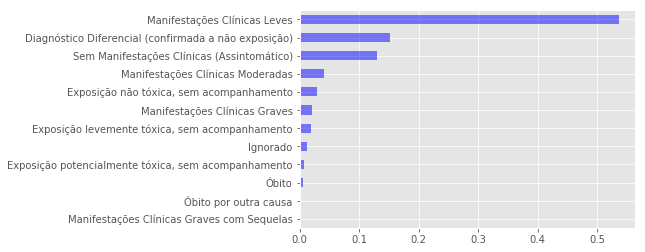

In [25]:
describe_and_plot(df12.desfecho, kind='barh', relative=True)

## Limpeza / Seleção / Transformação dos dados

---

In [26]:
def transform_age(row):
    quantity = row['idade']
    spec = row['especificacao_idade']
    
    if spec == 'Anos':
        quantity = quantity
    elif spec == 'Meses':
        quantity = quantity / 12
    elif spec == 'Dias':
        quantity = quantity / 365
    else:
        return None
        
    
    if quantity < 2:
        return 'Bebe'
    elif quantity >= 2 and quantity < 10:
        return 'Crianca'
    elif quantity >= 10 and quantity < 13:
        return 'Preadolescente'
    elif quantity >= 13 and quantity < 18:
        return 'Adolescente'
    elif quantity >= 18 and quantity < 30:
        return 'Jovem'
    elif quantity >= 30 and quantity < 60:
        return 'Adulto'
    elif quantity >= 60:
        return 'Idoso'
    else:
        return None

In [27]:
def transform_weight(row):
    weight = row['peso']
        
    if weight < 5:
        return 'ate_5'
    elif weight >= 5 and weight < 15:
        return '5_ate_15'
    elif weight >= 15 and weight < 25:
        return '15_ate_25'
    elif weight >= 25 and weight < 35:
        return '25_ate_35'
    elif weight >= 35 and weight < 45:
        return '35_ate_45'
    elif weight >= 45 and weight < 55:
        return '45_ate_55'
    elif weight >= 55 and weight < 65:
        return '55_ate_65'
    elif weight >= 65 and weight < 75:
        return '65_ate_75'
    elif weight >= 75 and weight < 85:
        return '75_ate_85'
    elif weight >= 85 and weight < 95:
        return '85_ate_95'
    elif weight >= 95:
        return 'acima_de_95'


---

### Conjunto de atributos #1

In [28]:
# tabela 01

features1 = one_hot(df01.classificacao_gravidade, 'classificacao_gravidade')

manifestacao_clinica_one_hot = one_hot(df01.manifestacao_clinica, 
                                       'manifestacao_clinica')

features1 = pd.concat([features1, manifestacao_clinica_one_hot], axis=1)

# tabela 04

idade = df04.apply(transform_age, axis=1)
idade_one_hot = one_hot(idade, 'faixaetaria')

gestante = df04.periodo_gestacao.map({
    'Não se aplica': 0, 
    'Não': 0, 
    'Ignorado': 0,
    'Primeiro trimestre': 1,
    'Segundo trimestre': 1,
    'Terceiro trimestre': 1,
    'Trimestre desconhecido': 1,
})

gestante = gestante.fillna(0).astype(np.uint8)
gestante.name = 'gestante'

peso = df04.apply(transform_weight, axis=1)
peso_one_hot = one_hot(peso, 'peso')

sexo_one_hot = one_hot(df04.sexo, 'sexo')

features_tmp = pd.DataFrame(idade_one_hot)
features_tmp = pd.concat([features_tmp, peso_one_hot, sexo_one_hot, gestante], axis=1)
features1 = pd.concat([features1, features_tmp], axis=1, join='inner')

# tabela 05

via_exposicao_one_hot = one_hot(df05.via_exposicao, 'via_exposicao')

intensidade_exposicao_one_hot = one_hot(df05.intensidade_exposicao, 
                                        'intensidade_exposicao')

circunstancia_exposicao_one_hot = one_hot(df05.circunstancia_exposicao, 
                                          'circunstancia_exposicao')

features_tmp = pd.DataFrame(via_exposicao_one_hot)
features_tmp = pd.concat([
    features_tmp, 
    intensidade_exposicao_one_hot, 
    circunstancia_exposicao_one_hot], axis=1)

features_tmp = features_tmp.loc[features1.index]
features1 = pd.concat([features1, features_tmp], axis=1).fillna(0).astype(np.uint8)

# tabela 06

grupo_agente_one_hot = one_hot(df06.grupo_agente, prefix='grupo_agente')

features_tmp = grupo_agente_one_hot.loc[features1.index]
features1 = pd.concat([features1, features_tmp], axis=1).fillna(0).astype(np.uint8)

# tabela 07

classificacao_manifestacao_one_hot = one_hot(df07.classificacao_manifestacao, 
                                             'classificacao_manifestacao')

features_tmp = classificacao_manifestacao_one_hot.loc[features1.index]
features1 = pd.concat([features1, features_tmp], axis=1).fillna(0).astype(np.uint8)

---

### Conjunto de atributos #2 (+ classe_agente, + manifestacao_apresentada)

In [29]:
# tabela 06

classe_agente_one_hot = one_hot(df06.classe_agente, 'classe_agente')

# tabela 07

manifestacao_apresentada_one_hot = one_hot(df07.manifestacao_apresentada, 
                                           'manifestacao_apresentada')

features2 = features1.copy()

features2 = pd.concat([
    features2, 
    classe_agente_one_hot.loc[features1.index]
], axis=1)

features2 = pd.concat([
    features2, 
    manifestacao_apresentada_one_hot.loc[features1.index]
], axis=1)

features2 = features2.fillna(0).astype(np.uint8)

---

### Conjunto de atributos #3 (+ subclasse_agente)

In [30]:
# tabela 07

subclasse_agente_one_hot = one_hot(df06.subclasse_agente, 'subclasse_agente')

features3 = features2.copy()
features3 = pd.concat([
    features2, 
    subclasse_agente_one_hot.loc[features1.index]
], axis=1)

features3 = features3.fillna(0).astype(np.uint8)

---

### Classes (desfecho)

In [31]:
df12 = pd.read_csv('./12_encerramento', sep='|', index_col='identificador_caso')
df12 = df12.loc[features1.index]
df12 = df12[~df12.desfecho.isnull()]

desfecho_counts = df12.groupby(df12.index).desfecho.count()
single_desfecho_ix = desfecho_counts[desfecho_counts==1].index

df12 = df12.loc[single_desfecho_ix]
df12.desfecho = df12.desfecho.astype('category')

labels = pd.DataFrame({
    'desfecho': df12.desfecho.cat.codes, 
    'classes': df12.desfecho 
})

In [32]:
# considerando apenas registros que tenham rótulo disponível

features1 = features1.loc[labels.index]
features2 = features2.loc[labels.index]
features3 = features3.loc[labels.index]

In [33]:
features1.to_csv('features1.csv', index=False)
features2.to_csv('features2.csv', index=False)
features3.to_csv('features3.csv', index=False)

labels.to_csv('labels.csv', index=False)

In [34]:
print 'dimensões conjunto de features #1:', features1.shape
print 'dimensões conjunto de features #2:', features2.shape
print 'dimensões conjunto de features #3:', features3.shape

dimensões conjunto de features #1: (40311, 107)
dimensões conjunto de features #2: (40311, 541)
dimensões conjunto de features #3: (40311, 1153)
